# Classification using pytorch

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=2,
                            centers=4,
                            cluster_std=1.5,
                            random_state=42)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,
                                                    random_state=69)

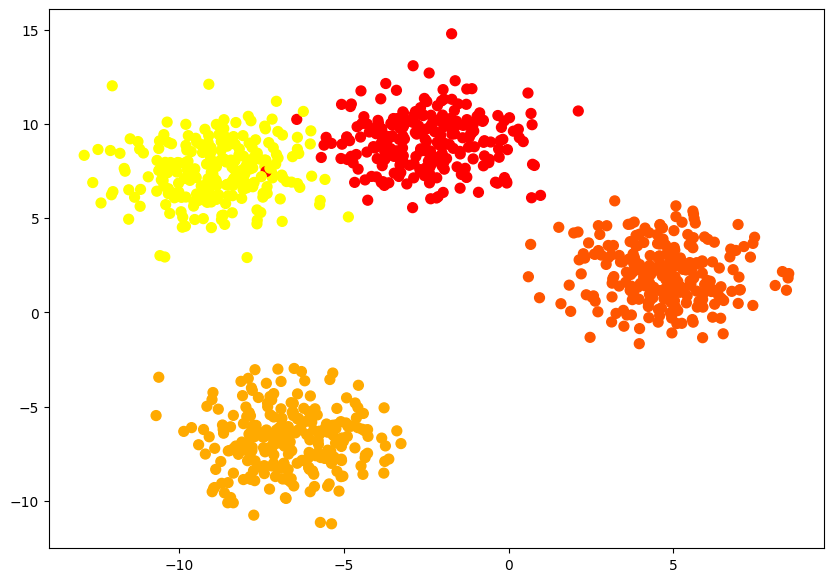

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, s=50, cmap='autumn')

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from torch import nn

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.graph = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.graph(x)

model = BlobModel(2, 4).to(device)
model

BlobModel(
  (graph): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [ ]:
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
epochs = 200


# Training
for epoch in range(epochs):
  model.train()
  y_logits = model(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if (epoch + 1) % 10 == 0:
    print(f"Epoch: {epoch + 1} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 10 | Loss: 0.54098 | Acc: 91.25% | Test Loss: 0.51624 | Test Acc: 95.00%
Epoch: 20 | Loss: 0.27460 | Acc: 98.88% | Test Loss: 0.25312 | Test Acc: 99.50%
Epoch: 30 | Loss: 0.14015 | Acc: 99.00% | Test Loss: 0.12795 | Test Acc: 100.00%
Epoch: 40 | Loss: 0.08888 | Acc: 99.00% | Test Loss: 0.07903 | Test Acc: 100.00%
Epoch: 50 | Loss: 0.06632 | Acc: 99.00% | Test Loss: 0.05648 | Test Acc: 100.00%
Epoch: 60 | Loss: 0.05455 | Acc: 99.00% | Test Loss: 0.04421 | Test Acc: 100.00%
Epoch: 70 | Loss: 0.04753 | Acc: 99.00% | Test Loss: 0.03667 | Test Acc: 100.00%
Epoch: 80 | Loss: 0.04294 | Acc: 99.00% | Test Loss: 0.03160 | Test Acc: 100.00%
Epoch: 90 | Loss: 0.03975 | Acc: 99.00% | Test Loss: 0.02798 | Test Acc: 100.00%
Epoch: 100 | Loss: 0.03741 | Acc: 99.00% | Test Loss: 0.02528 | Test Acc: 100.00%
Epoch: 110 | Loss: 0.03563 | Acc: 99.00% | Test Loss: 0.02318 | Test Acc: 100.00%
Epoch: 120 | Loss: 0.03425 | Acc: 99.00% | Test Loss: 0.02150 | Test Acc: 100.00%
Epoch: 130 | Loss: 0.03314 

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

with open("helper_functions.py", "wb") as f:
  f.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary

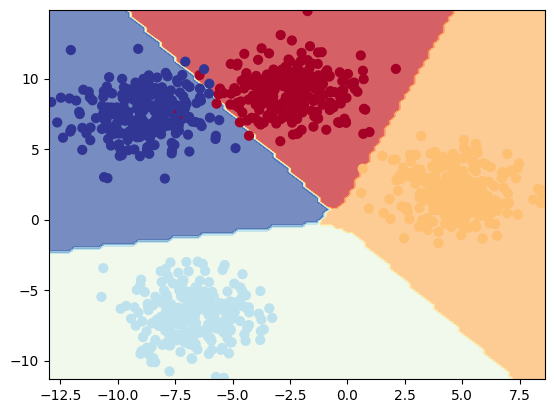

In [ ]:
plot_decision_boundary(model, X_blob, y_blob)